# **Forecasting Bitcoin Prices via ARIMA, XGBOOST, PROPHET, and LSTM**

- Accompanying Medium Blog: https://floreani.medium.com/how-well-can-machine-learning-models-predict-the-price-of-bitcoin-f036fdecdc03
- Kaggle Dataset: https://www.kaggle.com/mczielinski/bitcoin-historical-data
> 
<img src="https://media.giphy.com/media/8yQady2pFVfGJSnde7/giphy-downsized.gif">


### **Introduction**
> 
The cryptocurrency Bitcoin continues to make world headlines and rise in popularity as more and more people/organizations begin adopting it. In this notebook, I will test the Bitcoin forecasting abilities of 4 different Machine Learning models in Python: ARIMA, Prophet, XGBoost, and LSTM. By splitting the data into a testing and training set, I will compare each model’s performance with one another and conclude which performed best. 
> 
Let me know your thoughts, comments, or suggestions below! I'd appreciate it!

### **Table of Contents**
> 
This notebook will be broken down into 6 sections:
1. EDA
2. PROPHET
3. ARIMA
4. LSTM
5. XGBOOST
5. CONCLUSION (Comparing each model's RMSE)

**Standarized Procedure for Testing Models**
- Each model will be trained on the first 70% of the data and tested on the last 30%. The bitcoin data will be resampled to days and restricted to the past 4 years only (from March 31st, 2021).
- The Root Mean Square Error (RMSE) of each model will determine which is the best. The RMSE is the standard deviation of the residuals - or more simply how spread out the residuals are.


## **1. Exploratory Data Analysis**


In [42]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import helper_functions

In [43]:
number_of_days=1500

#Treatment pools
#treatment_pool_id="0x4a5a2a152e985078e1a4aa9c3362c412b7dd0a86"  #wstETH/WETH 0.05%
#treatment_pool_id="0x1c3140ab59d6caf9fa7459c6f83d4b52ba881d36" #OP/USDC 0.3%
#treatment_pool_id="0xbf16ef186e715668aa29cef57e2fd7f9d48adfe6" #USDC/DAI 0.01%
#treatment_pool_id="0x03af20bdaaffb4cc0a521796a223f7d85e2aac31" #WETH/DAI 0.3%
treatment_pool_id="0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640" #USDC/ETH 0.05%
#treatment_url="https://api.thegraph.com/subgraphs/name/ianlapham/optimism-post-regenesis"
treatment_url="https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"
#Control pools
#control_pool_id="0xd340b57aacdd10f96fc1cf10e15921936f41e29c" #wstETH/ETH 0.05% on ETH
#control_pool_id="0x68f5c0a2de713a54991e01858fd27a3832401849" #WETH/OP 0.3%
#control_pool_id="0xf1f199342687a7d78bcc16fce79fa2665ef870e1" #USDC/USDT 0.01% 
#control_pool_id="0x85149247691df622eaf1a8bd0cafd40bc45154a9"  #WETH/USDC 0.05%"

# Define sample periods

start_date = pd.to_datetime('2022-12-15')
end_date = pd.to_datetime('2023-05-15')


uniswap_data = helper_functions.get_uniswap_data(treatment_pool_id,number_of_days,treatment_url)
df = pd.DataFrame(uniswap_data)
df=helper_functions.preprocess_data(df)


#df = treatment_df.loc[(treatment_df['date'] >= start_date) & (treatment_df['date'] < end_date)].reset_index(drop=True)

#df['date']=df.index
print("Starting date: ",df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

df.head(10)



KeyError: 'data'

In [40]:
df['Weighted_Price']=df['close']
df['Timestamp']=df['date']
# sets the index as the date
df.index = df.Timestamp
# Resamples the data to the average daily value of each column. Removes excessive frequency
df = df.resample('D').mean()
# drops any missing values that are present
df = df.dropna()

df.head()

KeyError: 'close'

In [ ]:
print(df.shape)
# Now we have 3,376 rows instead of 4 million - with no missing values and accurate datetime information

(777, 16)


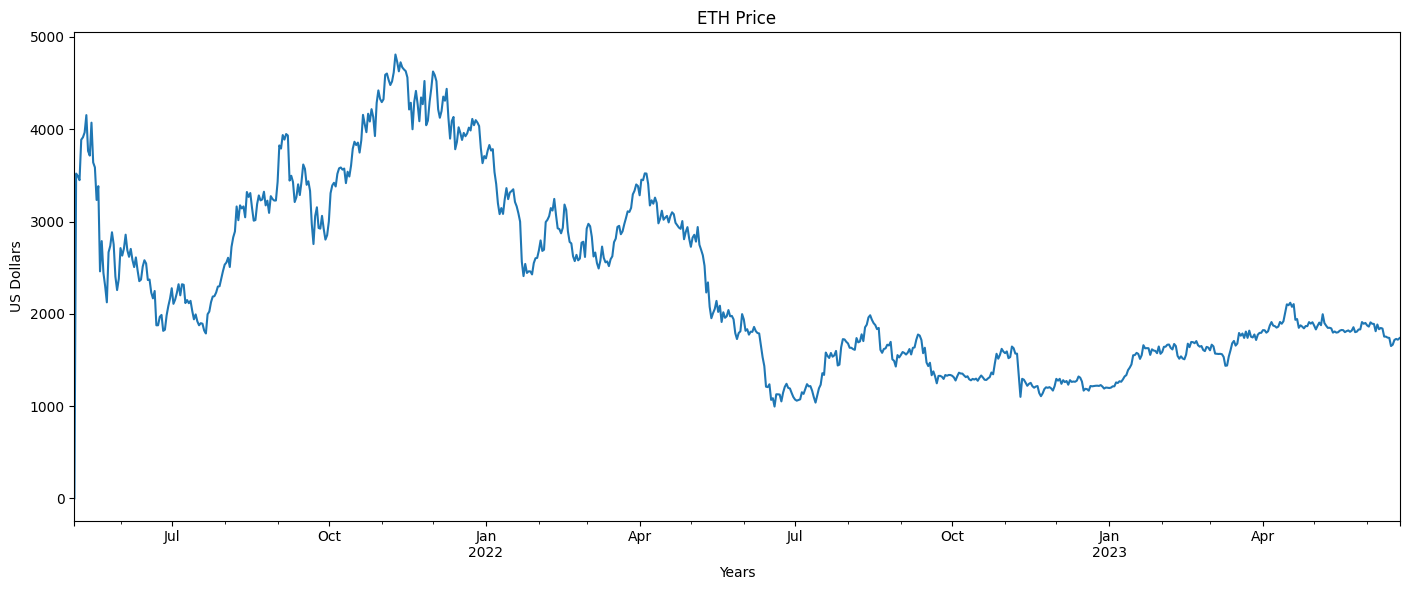

In [ ]:
# graph bitcoin price over the years
df.Weighted_Price.plot(title = "ETH Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()
# As the graph shows 2017-2021 price behavior looks signficantly different than 2012-2017

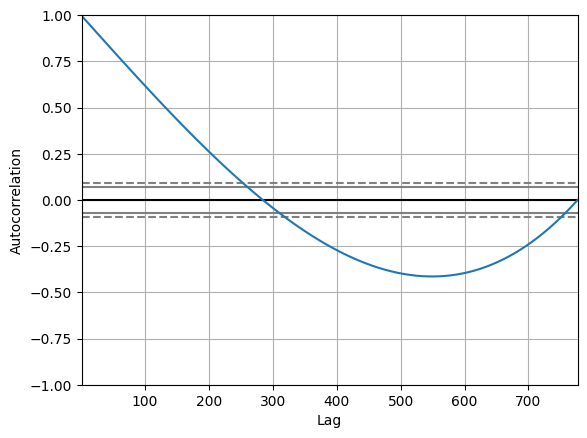

In [ ]:
# Convert the 'Timestamp' column of your DataFrame into numerical values
df['Timestamp'] = pd.to_numeric(df['Timestamp'])

# Plot the autocorrelation
autocorrelation_plot(df['Timestamp'])
plt.show()

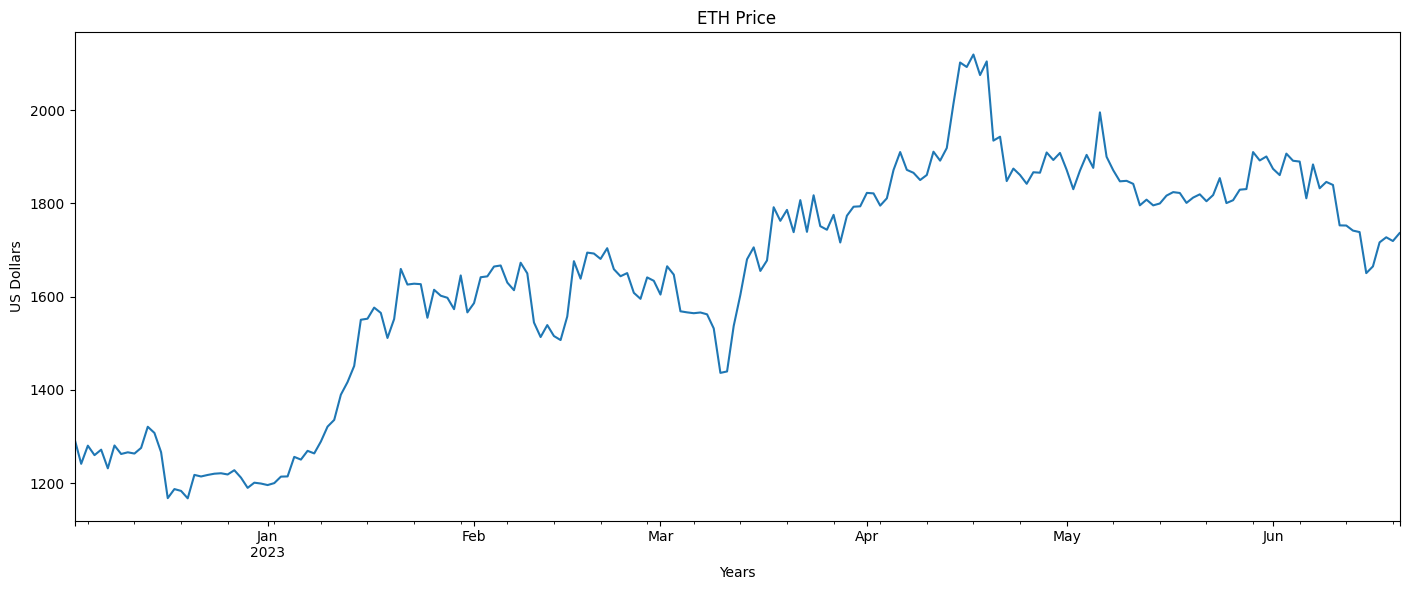

In [ ]:
# let's look at the past 200 days to possibly adjust our data to this period
df.Weighted_Price.iloc[-200:].plot(title = "ETH Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

## **1A. ROLLING FORECAST ARIMA**
I first created a rolling forecast ARIMA model in order to get a baseline for what a great RMSE is. However, since this model predicts in rolling day by day increments, it isn’t fair to compare to the other models. As plotted below, the predictions are in red and the actual prices are in blue. However, we have to zoom in more to distinguish the two.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# We're going to create a dataframe for just the price (the index is still the date)
price = df.Weighted_Price
# Next we're going to assign 70% percent of the data to training and 30% for testing
X = price.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

pandas.core.series.Series

predicted=1806.785144, expected=1726.394594
predicted=1737.420047, expected=1791.251960
predicted=1786.606259, expected=1810.455780
predicted=1806.461518, expected=1996.784564
predicted=1977.264096, expected=1939.431176
predicted=1939.699345, expected=1816.104232
predicted=1830.543749, expected=1832.592635
predicted=1834.927726, expected=1774.044007
predicted=1779.494432, expected=1805.955633
predicted=1804.551459, expected=1804.428711
predicted=1803.572304, expected=1857.683582
predicted=1852.287519, expected=1812.592814
predicted=1815.532122, expected=1791.763737
predicted=1795.325422, expected=1786.642395
predicted=1787.825970, expected=1661.276871
predicted=1674.262344, expected=1530.354851
predicted=1547.401306, expected=1433.656021
predicted=1447.052010, expected=1209.859681
predicted=1233.859004, expected=1205.614950
predicted=1211.703966, expected=1236.042289
predicted=1233.245886, expected=1067.028062
predicted=1082.471830, expected=1085.493575
predicted=1088.106289, expected=

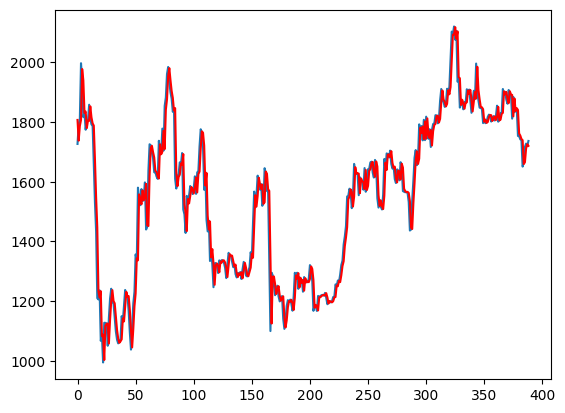

In [ ]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 59.520


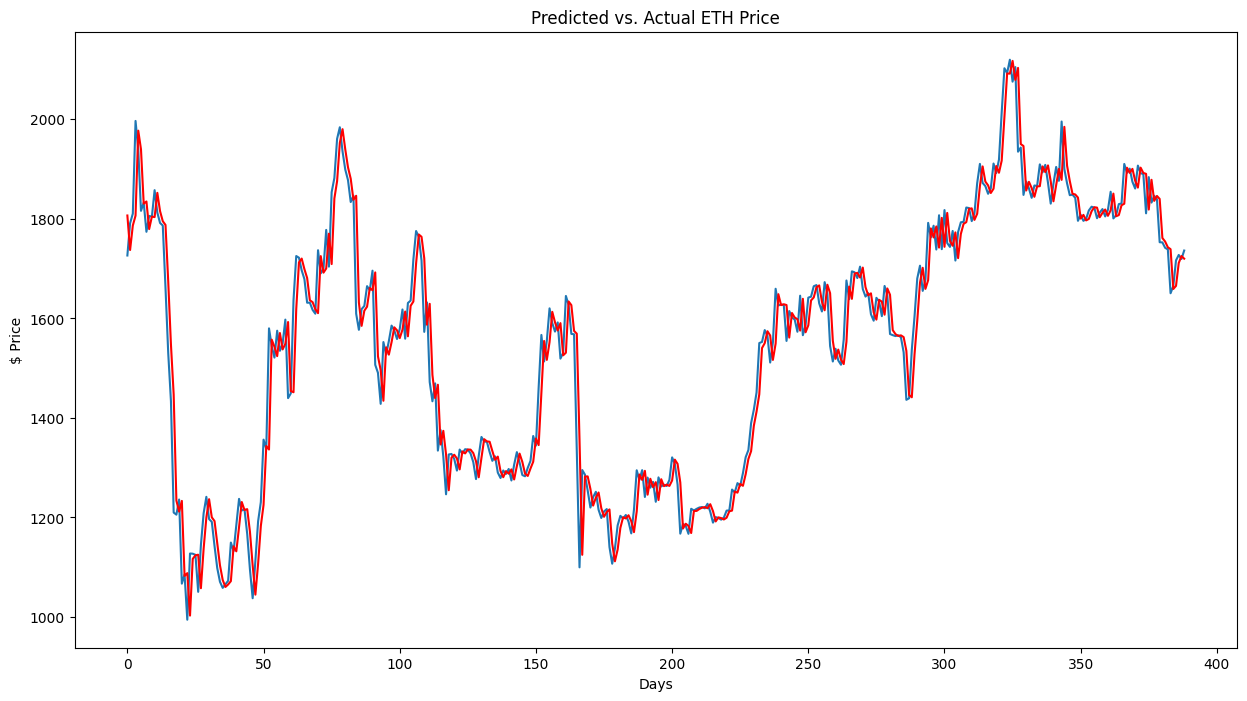

In [ ]:
# if we look at this model, the predicted is indistinuishable from the actual price
# this is simply because it's predicting day by day.
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual ETH Price')
plt.show()

Test RMSE: 59.520


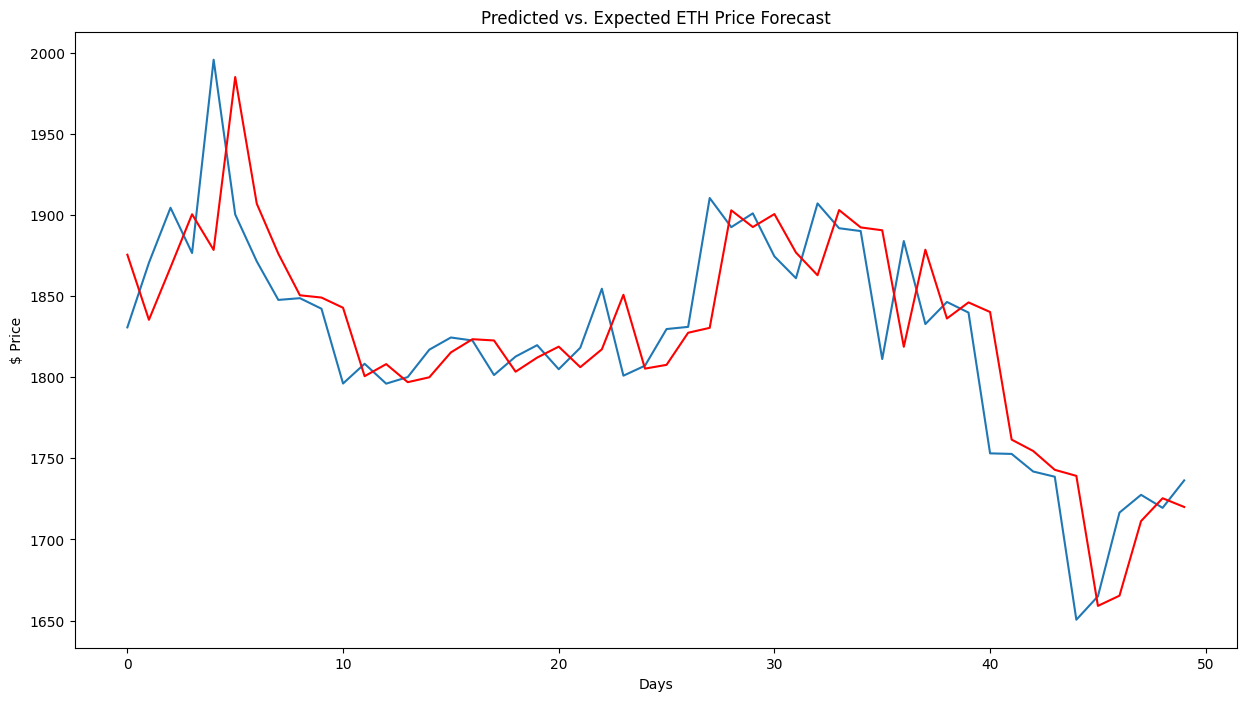

In [ ]:
# I plot 50 days to more accurately see how the models works with its lag
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[-50:])
plt.plot(predictions[-50:], color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Expected ETH Price Forecast')
plt.show()

## **2. PROPHET**
The Prophet library is an open-source library developed by Facebook and designed for automatic forecasting of time series data. This model mainly focuses on predicting trends and seasonality. However due to its easy use I decided to implement this model first with default settings. As plotted below the prophet model predicts the price of bitcoin will fall. In addition, the model provides upper and lower bounds estimates as well (edges of shaded region). While the upper bounds estimate has an accurate slope direction, this model didn’t perform well when compared to the test data.

In [41]:
!pip install fbprophet

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\hijaz tr\desktop\cadcadproject1\abcde\scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hijaz tr\\AppData\\Local\\Temp\\pip-install-0xu25q_m\\fbprophet_a87640157ec046649e83c4523d73a82f\\setup.py'"'"'; __file__='"'"'C:\\Users\\hijaz tr\\AppData\\Local\\Temp\\pip-install-0xu25q_m\\fbprophet_a87640157ec046649e83c4523d73a82f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hijaz tr\AppData\Local\Temp\pip-wheel-ieie9r5x'
       cwd: C:\Users\hijaz tr\AppData\Local\Temp\pip-install-0xu25q_m\fbprophet_a87640157ec046649e83c4523d73a82f\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creatin


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.27-py3-none-any.whl (598 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached 

    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword\recursive.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword\register.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword\return.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword\this.hpp -> build\lib.win-amd64-3.9\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\local_function\detail\preprocessor\keyword
    copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\

In [ ]:
# importing Prophet model
import fbprophet
from fbprophet import Prophet
# print version number
print('Prophet %s' % fbprophet.__version__)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# For prophet we have to fit the dataframe to two columns: ds, y
df3 = df.copy()
df3.reset_index(inplace=True)
df3 = df3[['Timestamp', 'Weighted_Price']]
df3.columns = ['ds', 'y']
# Next the data is split as usual
X = df3
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

In [ ]:
model = Prophet()
# fit the model
model.fit(train)

In [ ]:
# frequency is a day and periods are length of test data
future = model.make_future_dataframe(periods=len(test), freq='D')
forecasting = model.predict(future)
# prediction is stored and RMSE is returned
y_true = test['y'].values
y_pred = forecasting.yhat.values[-len(test):]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 25141.556


In [ ]:
forecasting.head()

ds        trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2017-04-02  3038.838847 -550.444742  2022.184105  3038.838847  3038.838847   
1 2017-04-03  3034.869401 -454.637607  2033.147564  3034.869401  3034.869401   
2 2017-04-04  3030.899955 -453.198266  1988.199030  3030.899955  3030.899955   
3 2017-04-05  3026.930508 -419.134369  2022.207908  3026.930508  3026.930508   
4 2017-04-06  3022.961062 -401.753789  2054.310265  3022.961062  3022.961062   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0    -2351.980901          -2351.980901          -2351.980901  -2.123923   
1    -2287.256094          -2287.256094          -2287.256094  19.057330   
2    -2245.027779          -2245.027779          -2245.027779  16.791104   
3    -2215.796077          -2215.796077          -2215.796077   1.484618   
4    -2198.650481          -2198.650481          -2198.650481 -25.154687   

   weekly_lower  weekly_upper       yearly  yearly_lower  yearly_upper  \
0     -2.123923     -2.123923 -2349.856978  -2349.856978  -2349.856978   
1     19.057330     19.057330 -2306.313424  -2306.313424  -2306.313424   
2     16.791104     16.791104 -2261.818883  -2261.818883  -2261.818883   
3      1.484618      1.484618 -2217.280695  -2217.280695  -2217.280695   
4    -25.154687    -25.154687 -2173.495794  -2173.495794  -2173.495794   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  686.857946  
1                         0.0  747.613307  
2                         0.0  785.872176  
3                         0.0  811.134432  
4                         0.0  824.310581

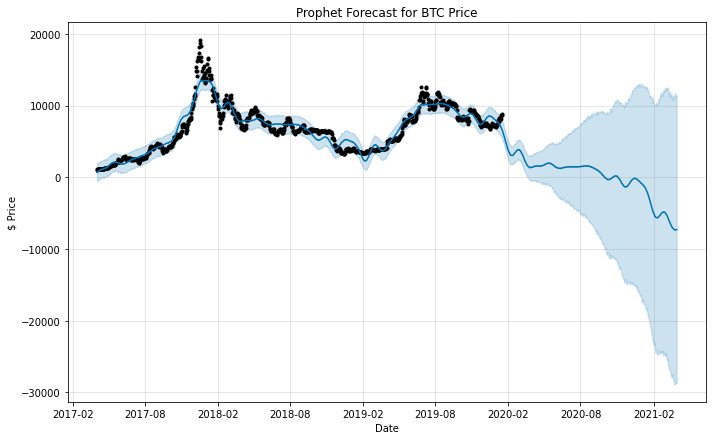

In [ ]:
# Plotting forecast
model.plot(forecasting)
plt.title('Prophet Forecast for BTC Price')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.show()

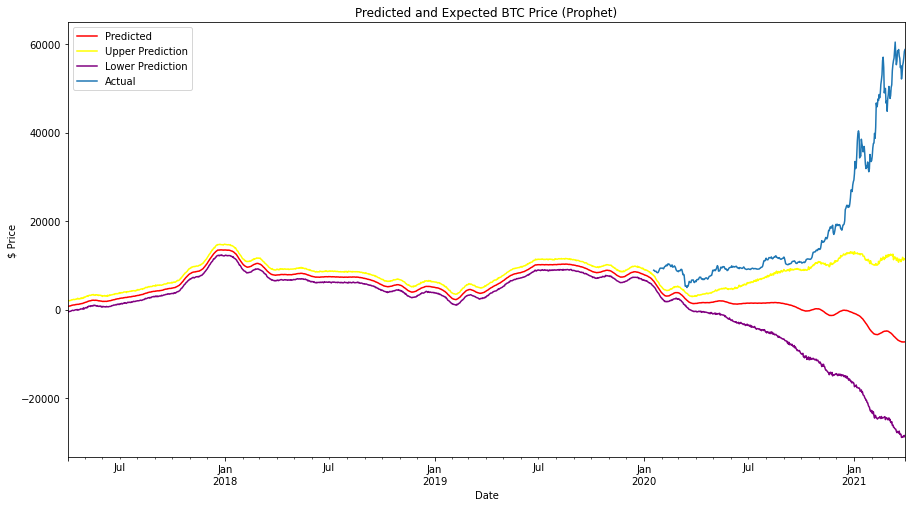

In [ ]:
# Plotting forecast with test data
ax = forecasting.plot(x='ds', y='yhat', legend=True, label="Predicted", figsize=(15,8), color='red')
forecasting.plot(x='ds', y='yhat_upper', legend=True, label='Upper Prediction', ax=ax, color='yellow')
forecasting.plot(x='ds', y='yhat_lower', legend=True, label='Lower Prediction', ax=ax, color='purple')
test.plot(x='ds', y='y', legend=True, label='Actual', ax=ax)
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.title('Predicted and Expected BTC Price (Prophet)')
plt.legend(loc='best')
plt.show()

## **3. ARIMA MODEL**
Next is ARIMA, an acronym that stands for AutoRegressive Integrated Moving Average. ARIMA is a widely used statistical method for analyzing and forecasting time series data. It consists of a suite of standard structures in time series data and provides a simple yet powerful method for making skillful time series forecasts. ARIMA models have 3 parameters (p, d, q), which indicate the specific ARIMA model being used. I simply applied parameters that I’ve used on different time series data in the past, which could’ve possibly led to an unfavorable model.

In [44]:
from statsmodels.tsa.arima.model import ARIMA
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [45]:
print(len(test))

389


In [46]:
# Split the data as usual 70, 30
price = df.Weighted_Price
X = price.values
datesX = price.index
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
days_in_year = 365
plotDates = datesX[size:len(X)]

# Next we will forecast with ARIMA using 5,1,0
differenced = difference(train, days_in_year)
model = ARIMA(differenced, order=(5, 1, 0))
model_fit = model.fit()
start_index = len(differenced)
end_index = start_index + 438
forecast = model_fit.predict(start=start_index, end=end_index)

history = [x for x in train]
day = 1
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print("Predicted Day %d: %f" % (day, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    day += 1

AttributeError: 'DataFrame' object has no attribute 'Weighted_Price'

In [ ]:
rmse = np.sqrt(mean_squared_error(test, predicted_results))
print('Test RMSE: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [234, 439]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  655
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4862.648
Method:                       css-mle   S.D. of innovations            405.410
Date:                Fri, 30 Jul 2021   AIC                           9739.296
Time:                        22:41:16   BIC                           9770.688
Sample:                             1   HQIC                          9751.468
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7440     21.291     -0.035      0.972     -42.474      40.986
ar.L1.D.y      0.2159      0.039      5.529      0.000       0.139       0.292
ar.L2.D.y      0.0256      0.040      0.643      0.5

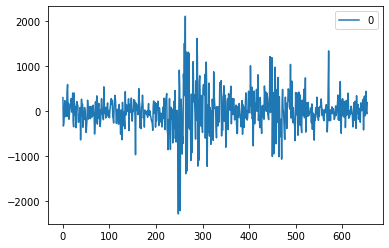

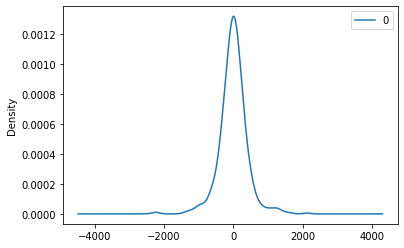

                 0
count   655.000000
mean     -0.088772
std     405.730521
min   -2280.438364
25%    -195.521870
50%       7.393693
75%     194.263830
max    2110.040288


In [ ]:
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

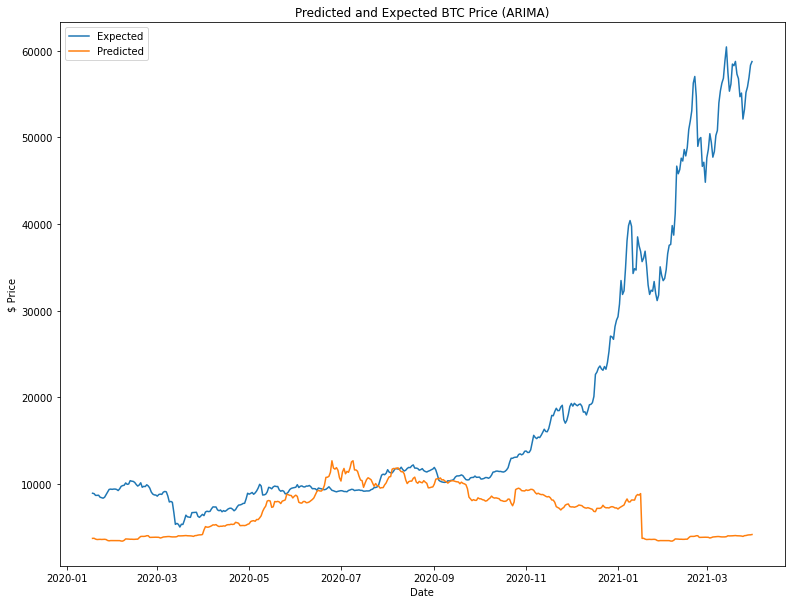

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(plotDates, test, label='Expected')
plt.plot(plotDates, predicted_results, label='Predicted')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.title('Predicted and ETH Price (ARIMA)')
plt.show()

## **4. LSTM**
Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. However, usually a LTSM would struggle with a time series dataset as volatile and unpredictable as Bitcoin. After a grueling process of trying to apply my data, I finally trained the model. In my final fit I used 50 epochs and the “adam” optimizer. (This model is inspired by another user's kaggle notebook).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
price = df.Weighted_Price
# As usual split data, 70, 30
X = price
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
# creates model
model = Sequential()
model.add(LSTM(24,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(LSTM(12,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
# fit the model to the training data
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
17/17 [==============================] - 4s 4ms/step - loss: 0.3281
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2946
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2606
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2247
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1870
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1058
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0679
Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0378
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 11/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0169
Epoch 12/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 13/50
17/17 [==============================

In [ ]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

8/8 [==============================] - 0s 3ms/step


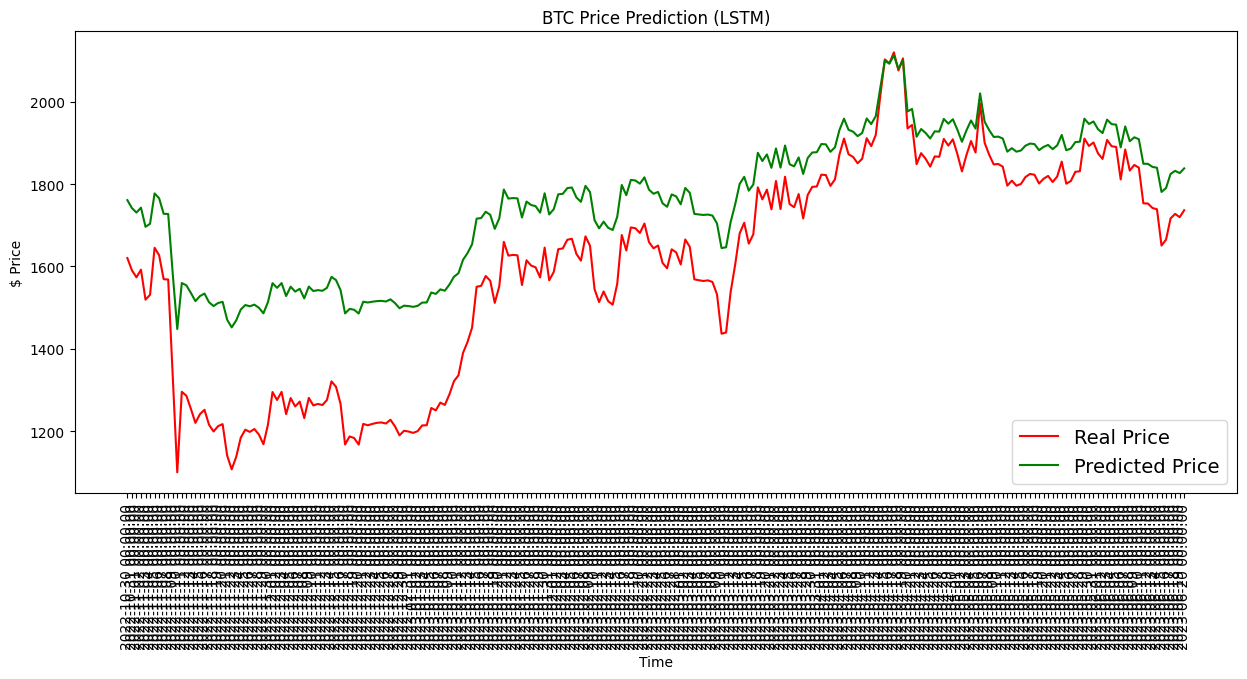

In [ ]:
# plotting the results
plt.figure(figsize=(15, 6))
ax = plt.gca()  
plt.plot(test_df.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('BTC Price Prediction (LSTM)')
test_df = test_df.reset_index()
x= test_df.index
labels = test_df['Timestamp']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df.Weighted_Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 181.335


## **5. XGBOOST MODEL**
XGBoost is one of the most popular machine learning algorithms these days. Regardless of the type of prediction task at hand; regression, or classification. XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the “state-of-the-art” machine learning algorithm to deal with structured data. However, in this situation we will be using it on time series data. Therefore, the model needed to create time series features from the datetime index - to be used alongside its target price labels when predicting. Unfortunately, in the end the model did not fair well.

In [ ]:
# splitting data again, 70, 30
df5 = df.copy()
X = df5
size = int(len(X) * 0.7)
data_train, data_test = X[0:size], X[size:len(X)]

In [ ]:
# a method to create a variety of features from a time series df
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
# assigning training and testing, features and labels (price)
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')


C:\Users\hijaz tr\AppData\Local\Temp\ipykernel_14124\1439771785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\hijaz tr\AppData\Local\Temp\ipykernel_14124\1439771785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\hijaz tr\AppData\Local\Temp\ipykernel_14124\1439771785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

AttributeError: 'DatetimeProperties' object has no attribute 'weekofyear'

In [ ]:
# import XGBoost, then create model, and fit it to the training data
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

[22:41:41] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
# assign predictions to data_test and then data_all
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

NameError: name 'X_test' is not defined

In [ ]:
data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

NameError: name 'data_all' is not defined

In [ ]:
data_test.head()

date      tick     sqrtPrice     liquidity     volumeUSD   
Timestamp                                                                   
2022-10-30 2022-10-30  202601.0  25074.063865  1.841060e+19  4.661577e+08  \
2022-10-31 2022-10-31  202710.0  25209.930385  1.938311e+19  6.663151e+08   
2022-11-01 2022-11-01  202672.0  25162.218664  4.973402e+19  3.873287e+08   
2022-11-02 2022-11-02  203061.0  25657.191355  2.307931e+19  8.240687e+08   
2022-11-03 2022-11-03  202984.0  25558.216559  2.819202e+19  3.423754e+08   

            volumeToken0   volumeToken1        tvlUSD        feesUSD   
Timestamp                                                              
2022-10-30  4.660418e+08  290947.126804  3.342951e+08  233078.861519  \
2022-10-31  6.661435e+08  421010.087742  3.204671e+08  333157.538473   
2022-11-01  3.874052e+08  244517.768900  3.394090e+08  193664.338285   
2022-11-02  8.239483e+08  528854.769974  3.292724e+08  412034.366529   
2022-11-03  3.423946e+08  222158.661095  3.333692e+08  171187.706195   

                  close         open          low         high    adj_close   
Timestamp                                                                     
2022-10-30  1620.151945  1620.151945  1567.748090  1639.401208  1620.151945  \
2022-10-31  1590.561835  1590.561835  1548.549557  1639.583243  1590.561835   
2022-11-01  1573.478027  1573.478027  1562.396319  1631.574202  1573.478027   
2022-11-02  1591.971294  1591.971294  1480.753785  1619.104043  1591.971294   
2022-11-03  1519.158921  1519.158921  1515.974004  1564.361821  1519.158921   

            Weighted_Price  Timestamp  
Timestamp                              
2022-10-30     1620.151945 2022-10-30  
2022-10-31     1590.561835 2022-10-31  
2022-11-01     1573.478027 2022-11-01  
2022-11-02     1591.971294 2022-11-02  
2022-11-03     1519.158921 2022-11-03

In [ ]:
rmse = np.sqrt(mean_squared_error(data_test['Weighted_Price'], data_test['Weighted_Price_Prediction']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18484.329


## **6. Conclusion**
The final results of the experiment are plotted below. The Long Short-Term Memory model proves to be the most effective when handling volatile and hard-to-predict data like Bitcoin prices. This Bitcoin dataset consisted of extremely volatile and abnormal time series data. Therefore, I was unsurprised to find that the models had a difficult time predicting the most recent 439 days of prices. In addition, I acknowledge that I could’ve picked better and more informed parameters for some of these models and libraries in order to make the results more fair. However, I think the LSTM model’s low RMSE proves how powerful neural networks can be in Machine Learning. I’d love to explore RNN’s in financial time series data more in the future!


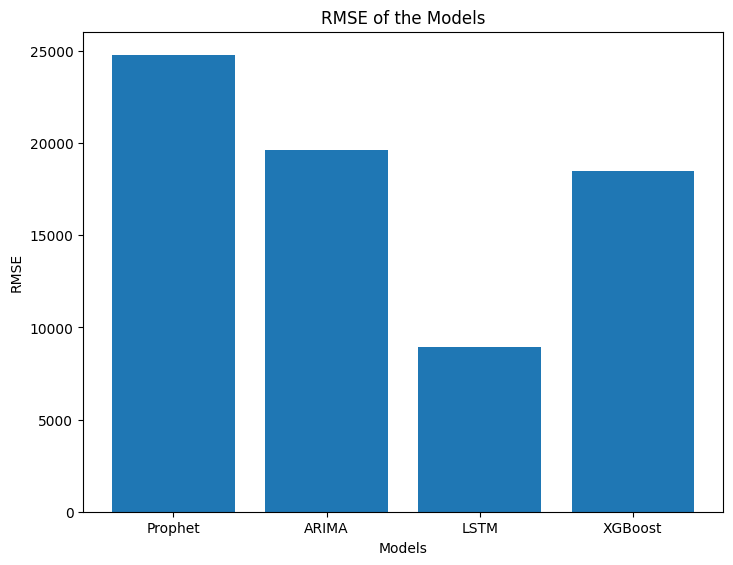

In [ ]:
# Final graph for the RMSE's of each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelz = ['Prophet', 'ARIMA', 'LSTM', 'XGBoost']
nums = [24810,19633,8950, 18483]
ax.bar(modelz,nums)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of the Models')
plt.show()
plt.show()

Thank you so much for reading! Let me know your thoughts and comments on the notebook!

# GBM

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

In [48]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

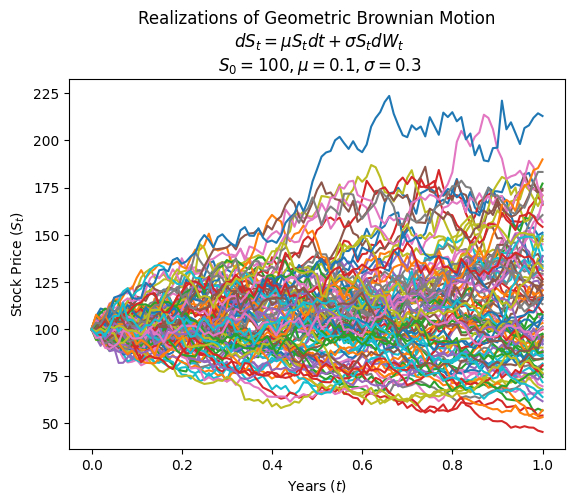

In [49]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()